In [4]:
%matplotlib widget
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [39]:
import matplotlib.pyplot as plt
import matplotlib.text as mtext

class LegendTitle(object):
    def __init__(self, text_props=None):
        self.text_props = text_props or {}
        super(LegendTitle, self).__init__()

    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        title = mtext.Text(x0, y0, orig_handle,  **self.text_props)
        handlebox.add_artist(title)
        return title


## Q3.3.d

Ordre de convergence - centré :
- $k=1$ : ordre 1
- $k=2$ : semble d'ordre 2 ! 
- $k=3$ : ordre 1


Ordre de convergence - upwind :
- $k=1$ : ordre 2 plutôt
- $k=2$ : semble d'ordre 1 !
- $k=3$ : ordre 2

In [42]:
df_q33d = pd.read_csv("q33d.csv")

Line2D(k)


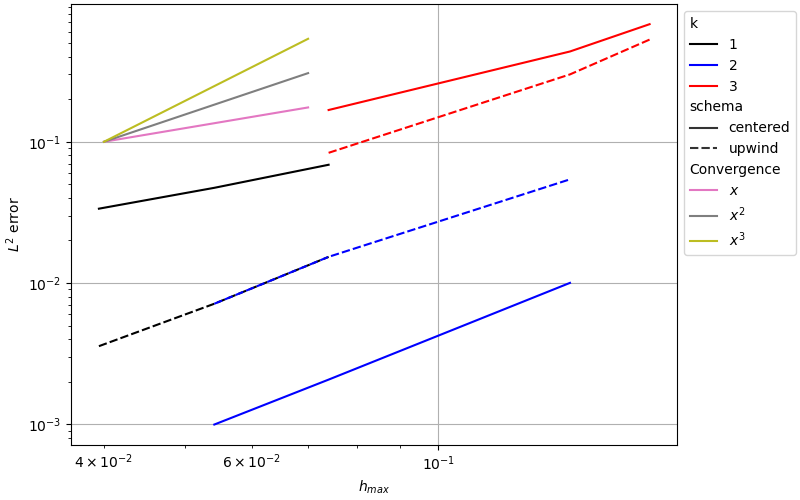

In [55]:
fig, ax = plt.subplots(figsize=(8,5), constrained_layout=True)
sns.lineplot(data=df_q33d, x="hmax", y="L2_E", hue="k", style="scheme", palette=["k", "b", "r"], ax=ax)

x = np.linspace(4e-2, 7e-2, 100)
y1 = 1.*x
y2 = x**2
y3 = x**3
start = 1e-1
y1 *= start/y1[0]
y2 *= start/y2[0]
y3 *= start/y3[0]

sns.lineplot(x=x, y=y1, label=r"$x$", ax=ax)
sns.lineplot(x=x, y=y2, label=r"$x^2$", ax=ax)
sns.lineplot(x=x, y=y3, label=r"$x^3$", ax=ax)

h,l = ax.get_legend_handles_labels()
ax.legend(['k'] + h[1:4] + ['schema'] + h[5:7] + ['Convergence'] + h[7:10],
          [' ']  + l[1:4] + [' '] + l[5:7] + [''] + l[7:10],
          handler_map={str: LegendTitle({'fontsize': 10})},
                    bbox_to_anchor=(1, 1))
ax.grid()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"$h_{max}$")
ax.set_ylabel(r"$L^2$ error");

Q3.3.e

TODO : problème sur les valeurs (le recopiage est OK)

In [48]:
df_q33e = pd.read_csv("q33e.csv")

Line2D(1)


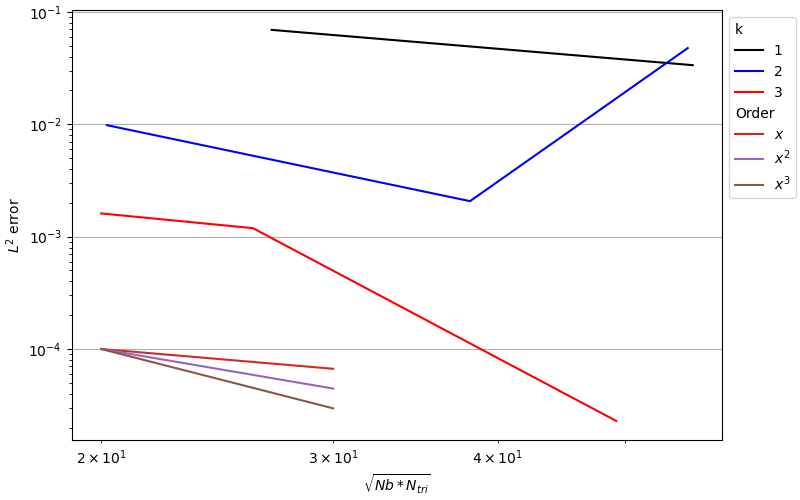

In [61]:
fig, ax = plt.subplots(figsize=(8,5), constrained_layout=True)
sns.lineplot(data=df_q33e, x="sqrt(Nb.Ntri)", y="L2_E", hue="k", palette=["k", "b", "r"], ax=ax)

x = np.linspace(20, 30, 100)
y1 = 1/x
y2 = 1/x**2
y3 = 1/x**3
start = 1e-4
y1 *= start/y1[0]
y2 *= start/y2[0]
y3 *= start/y3[0]

sns.lineplot(x=x, y=y1, label=r"$x$", ax=ax)
sns.lineplot(x=x, y=y2, label=r"$x^2$", ax=ax)
sns.lineplot(x=x, y=y3, label=r"$x^3$", ax=ax)

h,l = ax.get_legend_handles_labels()
ax.legend(['k'] + h[0:3] + ['Order'] + h[3:7],
          [' ']  + l[0:3] + [' ']  + l[3:7],
          handler_map={str: LegendTitle({'fontsize': 10})},
                    bbox_to_anchor=(1, 1))
ax.grid()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"$\sqrt{Nb * N_{tri}}$")
ax.set_ylabel(r"$L^2$ error");